# **House Prices Predictor - Advanced Regression**

### Importing all required libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

S:\anaconda3\lib\site-packages\ipykernel\parentpoller.py:113: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  warnings.warn("""Parent poll failed.  If the frontend dies,


### Storing the datasets

In [2]:
# Importing the datasets into dataframes
train_org_df = pd.read_csv('datasets/house_prices_train.csv')
test_org_df = pd.read_csv('datasets/house_prices_test.csv')
train_org_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
test_org_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


### Overall Plan

* Perform overviews of the overall data
* Data cleaning and preprocessing
* Exploratory Data Analysis
* Perform further data cleaning and preprocessing (if necessary)
* Choose a suitable machine learning model
* Determine the best parameters for the model
* Train the model
* Apply the model to the testing data

### Overview of the Data

I will combine the two datasets in order to keep consistency when performing data cleaning and preprocessing on the dataset. I will split the combined dataset back into training and testing datasets before I use the data for training the model.

In [4]:
# Get a copy of the training dataset
train_df = train_org_df.copy()
# Get a copy of the testing dataset
test_df = test_org_df.copy()

# Add a new column, 'Source', to training and testing datasets to differentiate between them
train_df['Source'] = 'train'
test_df['Source'] = 'test'

# Combined the two datasets to keep consistency when performing data cleaning and preprocessing
house_prices_df = train_df.append(test_df)
house_prices_df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Source
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,test
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,test
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,test
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,test


There are 2919 rows of combined data from both the training and testing datasets. 81 features in total (excluding 'Source').

In [5]:
# Get information on the count, mean, std, etc. of each numerical feature in the dataset
house_prices_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [6]:
print("Number of Numerical Features:", len(house_prices_df._get_numeric_data().columns))
print("Number of Categorical Features:", len(house_prices_df.columns) - len(house_prices_df._get_numeric_data().columns) - 1)
numerical_features = house_prices_df._get_numeric_data().columns.tolist()

Number of Numerical Features: 38
Number of Categorical Features: 43


In [7]:
# Check the data types of each feature in the dataset
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

From the information above, I can observe that there are many categorical features in this dataset. I must consider encoding methods for these features and use them before the dataset could be used for modelling.

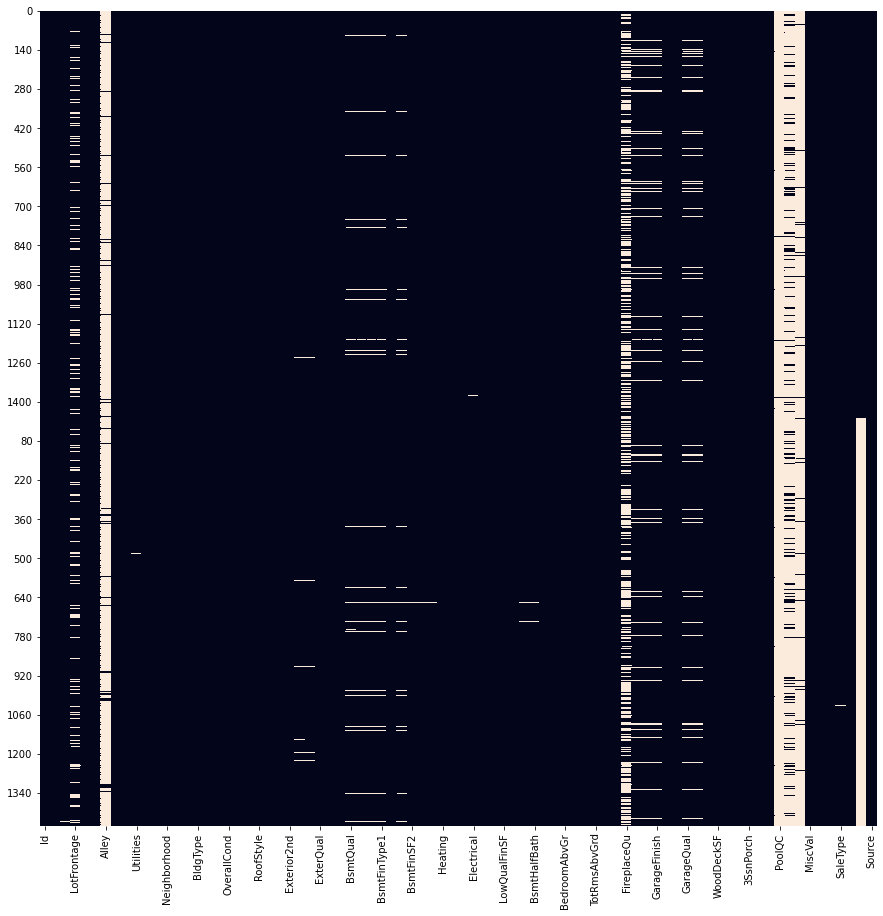

In [8]:
# Using a heatmap to observe the density of the number of null values in each feature
null_heatmap = sns.heatmap(house_prices_df.isnull(), cbar=False)
null_heatmap.figure.set_size_inches(15, 15)

The heatmap above showed that features such as 'PoolQC', 'MiscVal' and some others have a large number of null values. These features have too many null values and in turn, too little actual values. Therefore, filling in the null values with the existing values will give an inaccurate representaion of that feature since the number of existing values is so small. Because of this, I will drop these features.

In [9]:
# Retrieve specific number of null values in each feature
null_features = house_prices_df.isnull().sum()
for key, value in null_features.iteritems():
    print("{:15s} {}".format(key, value))

Id              0
MSSubClass      0
MSZoning        4
LotFrontage     486
LotArea         0
Street          0
Alley           2721
LotShape        0
LandContour     0
Utilities       2
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     1
Exterior2nd     1
MasVnrType      24
MasVnrArea      23
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        81
BsmtCond        82
BsmtExposure    82
BsmtFinType1    79
BsmtFinSF1      1
BsmtFinType2    80
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
Heating         0
HeatingQC       0
CentralAir      0
Electrical      1
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    2
BsmtHalfBath    2
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     1
TotRmsAbvGrd    

### Data Cleaning and Preprocessing - Exploratory Data Analysis

Firstly, I will drop features with too many null values. Then I will fill in all null values for all of the remaining features.

In [10]:
# Dropping all features with more than 2000 null values
house_prices_df = house_prices_df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
house_prices_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Source
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,6,2006,WD,Normal,NaN,test
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2006,WD,Abnorml,NaN,test
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,9,2006,WD,Abnorml,NaN,test
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,700,7,2006,WD,Normal,NaN,test


For the rest of the features with null values, fill them in with the mean if they are numerical features and with the mode if they are categorical features.

In [11]:
# Filling in the null values for the rest of the features
for column in house_prices_df:
    if house_prices_df[column].dtype == object:
        house_prices_df[column].fillna(house_prices_df[column].mode()[0], inplace=True)
        
    elif house_prices_df[column].dtype != object:
        if column == 'SalePrice':
            house_prices_df[column].fillna(1, inplace=True)
        else:
            house_prices_df[column].fillna(house_prices_df[column].mean(), inplace=True)


In [12]:
# Output the number of null values in each feature to check if all null values have been filled in
null_features = house_prices_df.isnull().sum()
for key, value in null_features.iteritems():
    print("{:15s} {}".format(key, value))

Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Fireplaces

All null values in all of the features have been filled in. Null values under the 'SalePrice' feature has been filled in with 1s as placeholders, because these values belong to the test dataset portion and will be dropped before modelling.

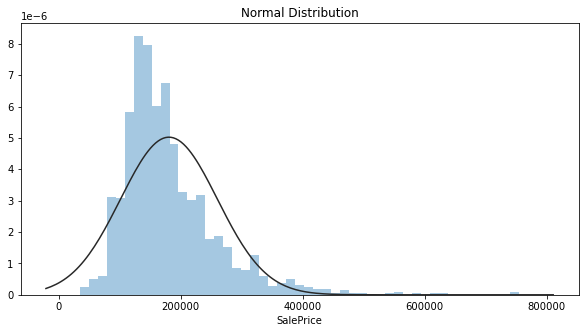

In [13]:
# Determine the distribution of the 'SalePrice' feature
sale_price = train_df['SalePrice']
plt.title('Normal Distribution')
sns.distplot(sale_price, kde=False, fit=st.norm).figure.set_size_inches(10, 5)

I can observe that the Sale Price does not follow a normal distribution. Therefore, it will need to be transformed. I will first try to fit the Log Normal Distribution curve on this feature

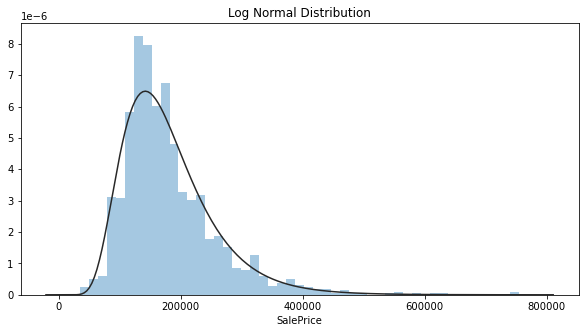

In [14]:
# Display the distribution with a Log Normal distribution curve
plt.title('Log Normal Distribution')
sns.distplot(sale_price, kde=False, fit=st.lognorm).figure.set_size_inches(10, 5)

The Log Normal Distribution curve seems to fit very well onto the Sale Price distribution. So I will transform the Sale Price into a Log Normal distribution.

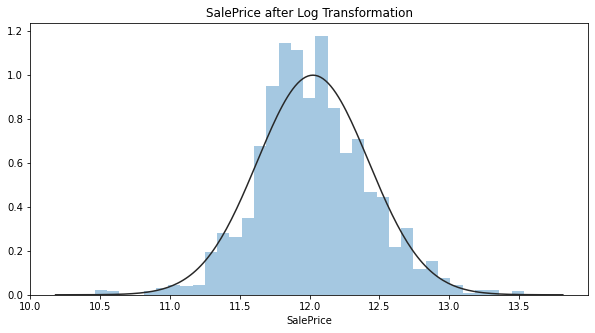

In [15]:
# Perform Log Transformation on the Sale Price feature in the datasets
train_df['SalePrice'] = train_df['SalePrice'].apply(lambda x: np.log1p(x))
house_prices_df['SalePrice'] = house_prices_df['SalePrice'].apply(lambda x: np.log1p(x) if x != None else x)

# Plot transformed plot
plt.title('SalePrice after Log Transformation')
sns.distplot(train_df['SalePrice'], kde=False, fit=st.norm).figure.set_size_inches(10, 5)

After the transformation, a Normal Distribution curve fits the data much better.

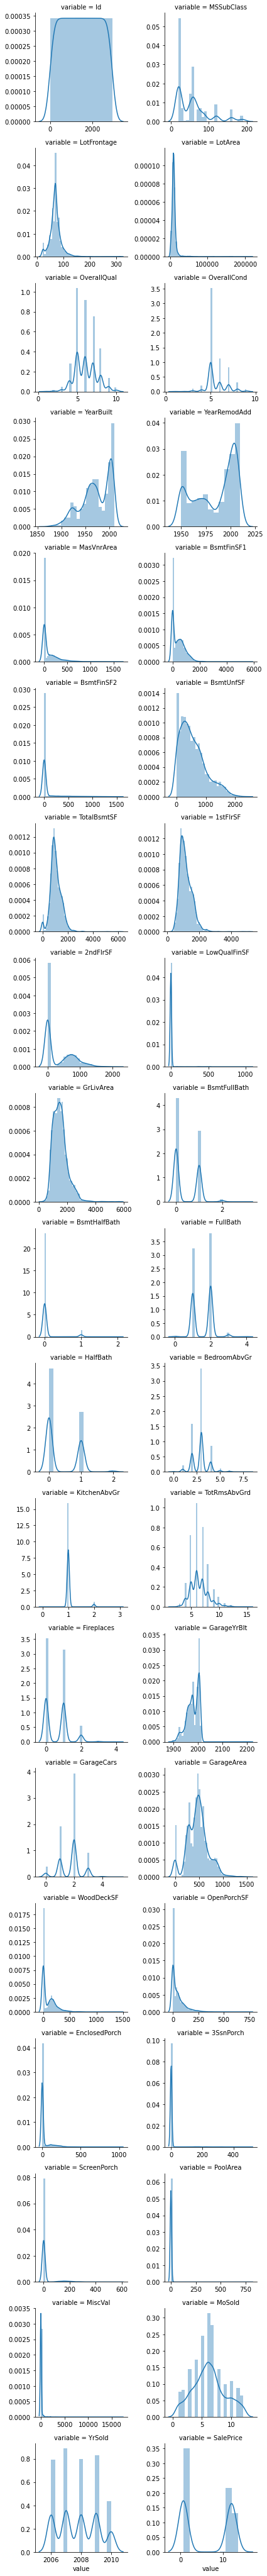

In [16]:
# Analyze the distributions of all the numerical features
numerical_features_df = pd.melt(house_prices_df, value_vars=numerical_features)
facet_grid = sns.FacetGrid(numerical_features_df, col="variable", col_wrap=2, sharex=False, sharey=False)
facet_grid = facet_grid.map(sns.distplot, "value")

From the plots above, it is observed that many features are skewed right and could be transformed by a Log Normal transformation. A few are also left skewed and those could be transformed by a Square transformation.

In [17]:
# Create a function that performs Log Normal transformation on a feature
def log_transform(column):
    house_prices_df[column] = house_prices_df[column].apply(lambda x: np.log1p(x) if x > 0 else x)
    
# Function that performs Square transformation on a feature
def square_transform(column):
    house_prices_df[column + "^2"] = house_prices_df[column] ** 2

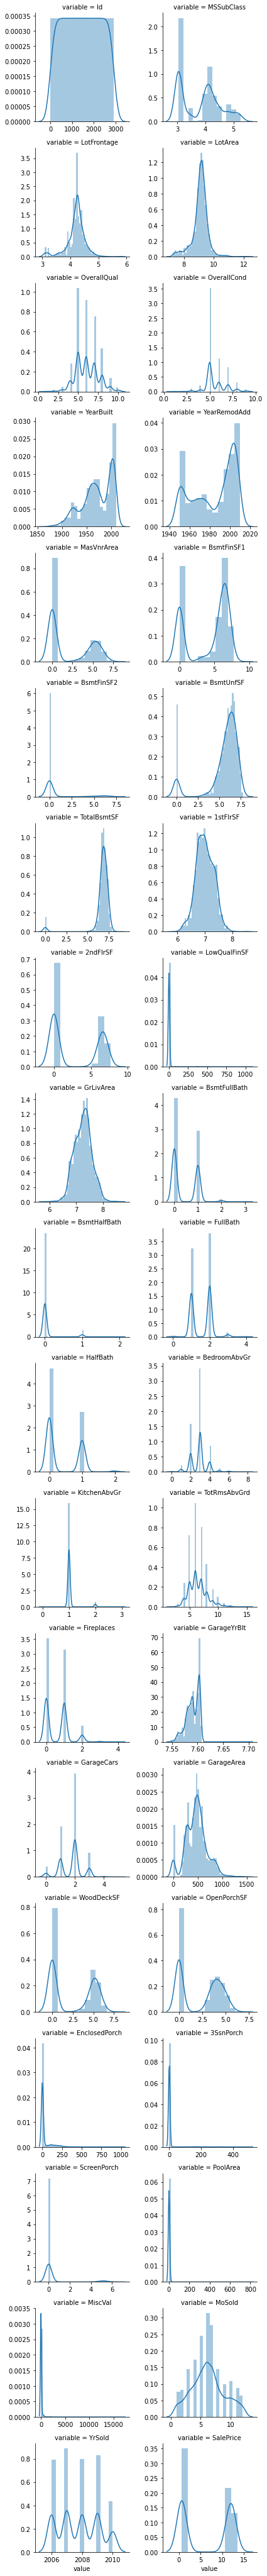

In [18]:
# Perform transformations on features
log_transform_features = ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 
                          'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch']
for feature in log_transform_features:
    log_transform(feature)

square_transform('YearBuilt')
square_transform('YearRemodAdd')

# Output the results after transformation
numerical_features_df = pd.melt(house_prices_df, value_vars=numerical_features)
facet_grid = sns.FacetGrid(numerical_features_df, col="variable", col_wrap=2, sharex=False, sharey=False)
facet_grid = facet_grid.map(sns.distplot, "value")

After the transformations, some features have became left skewed, so I will perform Square transformation on them.

In [19]:
# Perform Square transformations
square_transform('TotalBsmtSF')
square_transform('2ndFlrSF')

At this point, I will replace all rare categorical values with a general group value such as 'Other'. The threshold for the frequency of a categorical value is 1% out of the total frequencies of all categorical values.

In [20]:
# Get the headers of all categorical features
categorical_features = []

for column in house_prices_df:
    if house_prices_df[column].dtype == object and column != 'Source':
        categorical_features.append(column)
        
# Iterate through each categorical feature in the dataset
for feature in categorical_features:
    # Get the frequencies in proportions of each of the unique values
    frequencies = house_prices_df[feature].value_counts(normalize=True)
    # Map the frequencies of each value into its position in the dataset
    mapping = house_prices_df[feature].map(frequencies)
    # Replace values that have a frequency below 1%
    house_prices_df[feature].mask(mapping < 0.01, 'Other', inplace=True)

house_prices_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Source,YearBuilt^2,YearRemodAdd^2,TotalBsmtSF^2,2ndFlrSF^2
0,1,4.110874,RL,4.189655,9.042040,Pave,Reg,Lvl,AllPub,Inside,...,2,2008,WD,Normal,12.247699,train,4012009,4012009,45.608924,45.577371
1,2,3.044522,RL,4.394449,9.169623,Pave,Reg,Lvl,AllPub,FR2,...,5,2007,WD,Normal,12.109016,train,3904576,3904576,50.997382,0.000000
2,3,4.110874,RL,4.234107,9.328212,Pave,IR1,Lvl,AllPub,Inside,...,9,2008,WD,Normal,12.317171,train,4004001,4008004,46.586905,45.765752
3,4,4.262680,RL,4.110874,9.164401,Pave,IR1,Lvl,AllPub,Corner,...,2,2006,WD,Abnorml,11.849405,train,3667225,3880900,43.948457,43.948457
4,5,4.110874,RL,4.442651,9.565284,Pave,IR1,Lvl,AllPub,FR2,...,12,2008,WD,Normal,12.429220,train,4000000,4000000,49.618399,48.446441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,5.081404,RM,3.091042,7.568896,Pave,Reg,Lvl,AllPub,Inside,...,6,2006,WD,Normal,0.693147,test,3880900,3880900,39.746075,39.746075
1455,2916,5.081404,RM,3.091042,7.546974,Pave,Reg,Lvl,AllPub,Inside,...,4,2006,WD,Abnorml,0.693147,test,3880900,3880900,39.746075,39.746075
1456,2917,3.044522,RL,5.081404,9.903538,Pave,Reg,Lvl,AllPub,Inside,...,9,2006,WD,Abnorml,0.693147,test,3841600,3984016,50.561999,0.000000
1457,2918,4.454347,RL,4.143135,9.253591,Pave,Reg,Lvl,AllPub,Inside,...,7,2006,WD,Normal,0.693147,test,3968064,3968064,46.467888,0.000000


Generate new features that will have high correlations with the target feature

In [21]:
# Combine existing features to generate new features
house_prices_df['YearBuiltandRemodAdd'] = house_prices_df['YearBuilt'] + house_prices_df['YearRemodAdd']
house_prices_df['TotalSF'] = house_prices_df['TotalBsmtSF'] + house_prices_df['1stFlrSF'] + house_prices_df['2ndFlrSF']
house_prices_df['TotalBathrooms'] = house_prices_df['FullBath'] + (0.5 * house_prices_df['HalfBath']) + house_prices_df['BsmtFullBath'] + (0.5 * house_prices_df['BsmtHalfBath'])
house_prices_df['TotalPorchSF'] = house_prices_df['OpenPorchSF'] + house_prices_df['3SsnPorch'] + house_prices_df['EnclosedPorch'] + house_prices_df['ScreenPorch'] + house_prices_df['WoodDeckSF']

For the categorial features, Dummy Encoding will be used to encode the categorical values.

In [22]:
# Use Dummy Encoding on all categorical features
house_prices_df = pd.get_dummies(data=house_prices_df, columns=categorical_features)

# Remove all duplicated columns
house_prices_df = house_prices_df.loc[:, ~house_prices_df.columns.duplicated()]
house_prices_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,PavedDrive_Y,SaleType_COD,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,1,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,...,1,0,0,0,1,0,0,1,0,0
1,2,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,...,1,0,0,0,1,0,0,1,0,0
2,3,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,...,1,0,0,0,1,0,0,1,0,0
3,4,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,...,1,0,0,0,1,1,0,0,0,0
4,5,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,5.081404,3.091042,7.568896,4,7,1970,1970,0.000000,0.000000,...,1,0,0,0,1,0,0,1,0,0
1455,2916,5.081404,3.091042,7.546974,4,5,1970,1970,0.000000,5.533389,...,1,0,0,0,1,1,0,0,0,0
1456,2917,3.044522,5.081404,9.903538,5,7,1960,1996,0.000000,7.110696,...,1,0,0,0,1,1,0,0,0,0
1457,2918,4.454347,4.143135,9.253591,5,5,1992,1992,0.000000,5.823046,...,1,0,0,0,1,0,0,1,0,0


In [23]:
# Split the dataset back into a training and testing dataset to ready them for modelling
train_preprocessed = pd.DataFrame(house_prices_df[house_prices_df['Source'] == 'train'])
test_preprocessed = pd.DataFrame(house_prices_df[house_prices_df['Source'] == 'test'])
train_preprocessed = train_preprocessed.drop('Source', axis=1)
test_preprocessed = test_preprocessed.drop(['SalePrice', 'Source'], axis=1)

In [24]:
# Export the preprocessed datasets as csv files
train_preprocessed.to_csv(r'datasets/house_prices_train_preprocessed.csv')
test_preprocessed.to_csv(r'datasets/house_prices_test_preprocessed.csv')

### Modelling

Now that the datasets have been cleaned and preprocessed, I will choose a suitable model and train the model on the training dataset.

In [25]:
# Split the training dataset into the target feature and the remaining features
X = train_preprocessed.drop(['SalePrice'], axis=1)
y = train_preprocessed['SalePrice']

# Normalize the training dataset and testing dataset
scaler = StandardScaler()
scaler.fit_transform(X)
scaler.fit_transform(test_preprocessed)

array([[-1.73086406, -1.11658492,  0.60666749, ...,  0.46021084,
        -0.11789207, -0.29936452],
       [-1.72848977, -1.11658492,  0.64417627, ...,  0.46021084,
        -0.11789207, -0.29936452],
       [-1.72611547,  0.41444942,  0.37140322, ...,  0.46021084,
        -0.11789207, -0.29936452],
       ...,
       [ 1.72611547, -1.11658492,  2.70663928, ..., -2.17291708,
        -0.11789207, -0.29936452],
       [ 1.72848977,  0.90759794, -0.16158232, ...,  0.46021084,
        -0.11789207, -0.29936452],
       [ 1.73086406,  0.41444942,  0.37140322, ...,  0.46021084,
        -0.11789207, -0.29936452]])

In [26]:
# Create the XGBoosting Regressor
regressor = xgb.XGBRegressor(objective='reg:squarederror', nthread=-1, scale_pos_weight=1, seed=27, reg_alpha=0.00006)

# A dictionary of important parameters and their possible values
params = {
    "max_depth"         :   [2, 3, 4, 5, 6, 7, 8, 10],
    "learning_rate"     :   [0.01, 0.05, 0.10, 0.15, 0.20],
    "n_estimators"      :   [1000, 1250, 1500, 1750, 2000, 2500, 3000, 3460, 3700, 4000],
    "min_child_weight"  :   [0, 1, 2, 3, 4],
    "gamma"             :   [0, 1, 2],
    "subsample"         :   [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
    "colsample_bytree"  :   [0, 0.3, 0.5, 0.7, 0.9, 1],
}

# Hyperparameter Tuning using Randomized Search
random_search = RandomizedSearchCV(regressor, param_distributions=params, n_iter=10, scoring='neg_mean_squared_error', n_jobs=4, cv=5, verbose=3)
random_search.fit(X, y)

# Output the best parameters from the Randomized Search
random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  7.0min finished


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=1250, n_jobs=8, nthread=-1, num_parallel_tree=1,
             random_state=27, reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1,
             seed=27, subsample=0.1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [30]:
# Create the Gradient Boosting Regressor model with the most optimal parameters
regressor = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
                             importance_type='gain', interaction_constraints='',
                             learning_rate=0.01, max_delta_step=0, max_depth=6,
                             min_child_weight=2, monotone_constraints='()',
                             n_estimators=1250, n_jobs=8, nthread=-1, num_parallel_tree=1,
                             random_state=27, reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1,
                             seed=27, subsample=0.1, tree_method='exact', validate_parameters=1,
                             verbosity=None)
regressor.fit(X, y)

# Predict the target values for the testing dataset
y_hat = regressor.predict(test_preprocessed)

# Apply inverse log on y_hat values
y_hat = np.expm1(y_hat)

In [31]:
# Create submission file
y_hat_df = pd.DataFrame(y_hat)
sample_submission_df = pd.read_csv('datasets/sample_submission.csv')
submission = pd.concat([sample_submission_df['Id'], y_hat_df], axis=1)
submission.columns = ['Id', 'SalePrice']
submission.to_csv('house_prices_submission.csv', index=False)